/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/brainpy/_src/deprecations.py:89: DeprecationWarning: brainpy.dyn.TwoEndConn is deprecated. Use brainpy.synapses.TwoEndConn instead.
  _deprecate(message)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/brainpy/_src/deprecations.py:89: DeprecationWarning: brainpy.dyn.Network is deprecated. Use brainpy.Network instead.
  _deprecate(message)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/brainpy/_src/deprecations.py:89: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use brainpy.DSRunner instead.
  _deprecate(message)


(Array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],      dtype=int32), Array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],      dtype=int32))
MatConn
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


Predict 60000 steps: :   0%|          | 0/60000 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/brainpy/_src/dynsys.py:325: UserWarning: 
From brainpy>=2.4.3, update() function no longer needs to receive a global shared argument.

Instead of using:

  def update(self, tdi, *args, **kwagrs):
     t = tdi['t']
     ...

Please use:

  def update(self, *args, **kwagrs):
     t = bp.share['t']
     ...

  warnings.warn(_update_deprecate_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/brainpy/_src/dynsys.py:325: UserWarning: 
From brainpy>=2.4.3, update() function no longer needs to receive a global shared argument.

Instead of using:

  def update(self, tdi, *args, **kwagrs):
     t = tdi['t']
     ...

Please use:

  def update(self, *args, **kwagrs):
     t = bp.share['t']
     ...

  warnings.warn(_update_deprecate_msg, UserWarning)


post_g= (50,)
post_g= (50,)


Predict 60000 steps: :   0%|          | 0/60000 [00:00<?, ?it/s]


Figure Width: 12.0


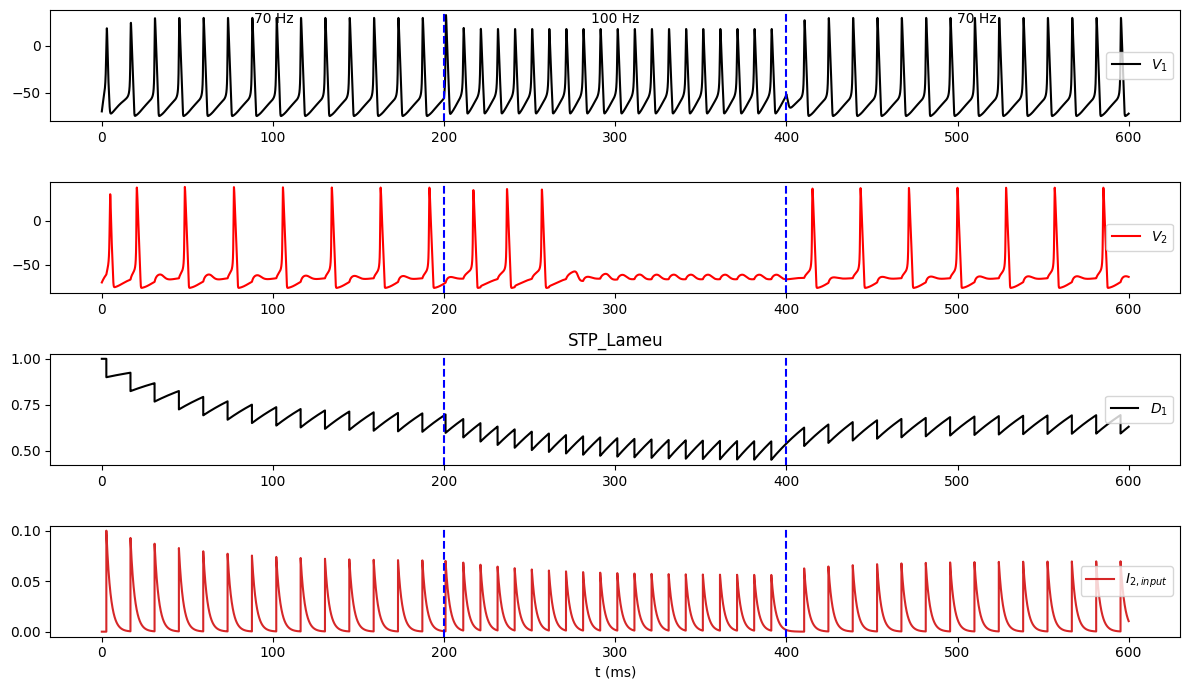

In [25]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
# most useful link
#https://github.com/shujiezhang-cn/Brainpy-CN/blob/main/WorkingMemory/STP.py
# this result was because of tau .. when i decreased tau from 8 to 2.5 postsynaptic neuron gave same output
# ToDo
# still have to sort out this connectivity issue
# as only one neuron is connected .. then why I am getting post synaptic activity for all neurons .. while
# I should get only for 1 neuron which is connected
# It does not makes sense. Ask konstas


import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
# from brainpy._src.integrators import JointEq
# from brainpy._src.context import share
import numpy as np
import jax
import jax.numpy as jnp
bp.math.set_dt(0.01)


# current, duration = bp.inputs.constant_input([(10,1000)])
current, duration = bp.inputs.section_input(values=[10.97, 31.8, 10.97],
                                             durations=[200, 200, 200],
                                             return_length=True,
                                             dt=0.01)

import numpy as np
import matplotlib.pyplot as plt

def show(current, duration, title):
    ts = np.arange(0, duration, bm.get_dt())
    plt.plot(ts, current)
    plt.title(title)
    plt.xlabel('Time [ms]')
    plt.ylabel('Current Value')
    plt.show()

# show(current, duration, 'values=[0, 1, 0], durations=[100, 300, 100]')


class HH2(bp.dyn.CondNeuGroup):
    def __init__(self, size):
        super(HH2, self).__init__(size, V_initializer=bp.init.Constant(-70.), V_th=0.)
        # eqn 9->12
        self.Na = bp.dyn.SodiumFixed(size, E=50.)
        self.Na.add_elem(ina=bp.dyn.INa_HH1952v2(size, g_max=120., phi=1., V_sh=-45.))

        # eqn 7->8
        self.K = bp.dyn.PotassiumFixed(size, E=-77.)
        self.K.add_elem(ik=bp.dyn.IK_HH1952v2(size, g_max=36., phi=1., V_sh=-45.))

        self.IL = bp.dyn.IL(size, E=-54.4, g_max=0.3)
class STP(bp.dyn.TwoEndConn):
    def __init__(self, pre, post, conn, g_max=0.1,tau_d=50., tau_f=2.728,
    tau=2.5, E=20., delay_step=0, method='exp_auto', **kwargs):
        super(STP, self).__init__(pre=pre, post=post, conn=conn, **kwargs)
        # 初始化参数
        self.tau_d = tau_d
        self.tau_f = tau_f
        self.tau = tau
        self.g_max = g_max
        self.E = E
        self.delay_step = delay_step
        # 获取每个连接的突触前神经元pre_ids和突触后神经元post_ids
        self.pre_ids, self.post_ids = self.conn.require('pre_ids', 'post_ids')
        # 初始化变量
        print(self.pre_ids)
        num = len(self.pre_ids)
        self.x = bm.Variable(bm.ones(num))
        self.u = bm.Variable(bm.zeros(num))
        self.g = bm.Variable(bm.zeros(num))
        self.delay = bm.LengthDelay(self.g, delay_step) # 定义一个处理g的延迟器
        # 定义积分函数
        self.integral = bp.odeint(method=method, f=self.derivative)

    @property
    def derivative(self):
        du = lambda u, t: - u / self.tau_f
        dx = lambda x, t: (1 - x) / self.tau_d
        dg = lambda g, t: -g / self.tau
        return bp.JointEq(du, dx, dg)

    def update(self, tdi):
        # 将g的计算延迟delay_step的时间步长
        delayed_g = self.delay(self.delay_step)
        # 计算突触后电流
        post_g = bm.syn2post(delayed_g, self.post_ids, self.post.num)
        print('post_g=',post_g.shape) # jax.debug.print("t={}",post_g))
        self.post.input += post_g * (self.E - self.post.V) #self.post.V_rest)
        # multiplied with 55
        # 更新各个变量
        syn_sps = bm.pre2syn(self.pre.spike, self.pre_ids)
        u, x, g = self.integral(self.u, self.x, self.g, tdi.t, tdi.dt)
        u = bm.where(syn_sps, 1, u)
        x = bm.where(syn_sps, x - 0.1, x)
        g = bm.where(syn_sps, g + self.g_max * u * self.x, g)
        self.u.value = u
        self.x.value = x
        self.g.value = g
        # 更新延迟器
        self.delay.update(self.g)


num_neurons = 50

# Create an empty binary matrix (all zeros)
connection_matrix = np.zeros((num_neurons, num_neurons), dtype=int)

# Define unidirectional connections
# For example, neuron 1 to neuron 2, neuron 2 to neuron 3, etc.
for i in range(num_neurons - 1):
    connection_matrix[i, i + 1] = 1

# Print the connection matrix
# print("Connection Matrix:")
# print(connection_matrix)
# #
import brainpy as bp
conn_m = bp.conn.MatConn(connection_matrix)
conn_m = conn_m(50,50)
print(conn_m.require('pre_ids', 'post_ids'))
# interesting behaviour when post neuron is same as pre neuron
# connectivity changes the behavior of neuron

def run_STP(title=None, **kwargs):
# 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
    neu1 = HH2(50)#bp.neurons.LIF(1)
    neu2 = HH2(50)#bp.neurons.LIF(1)
    syn = STP(neu1, neu2, conn_m, **kwargs)
    net = bp.dyn.Network(pre=neu1, syn=syn, post=neu2)

# 分段电流
#     inputs, dur = bp.inputs.section_input(values=[22., 0., 22., 0.],
#     durations=[200., 200., 25., 75.],
#     return_length=True)
# 运行模拟
    runner = bp.dyn.DSRunner(net,inputs=[('pre.input', current, 'iter')],
    monitors=['pre.V', 'post.V','syn.u', 'syn.x', 'syn.g'])
    runner.run(600)

# 可视化

    fig, gs = plt.subplots(4, 1, figsize=(12, 7))
    
        # Define your labels
    left_label = "70 Hz"
    middle_label = "100 Hz"
    right_label = "70 Hz"

    # Determine the total width for alignment
    total_width = 12  # Adjust this based on your needs
    
    gs[0].text(0.18, 0.98, left_label, transform=gs[0].transAxes,
            va='top', ha='left', fontsize=10)


    # Add a text annotation in the middle of the first axis
    gs[0].text(0.5, 0.98, middle_label, transform=gs[0].transAxes,
                va='top', ha='center', fontsize=10)

    # Add a text annotation on the right side of the first axis
    gs[0].text(0.82, 0.98, right_label, transform=gs[0].transAxes,
                va='top', ha='center', fontsize=10)



    plt.sca(gs[0])
    plt.plot(runner.mon.ts, runner.mon['pre.V'][:, 0],color='black', label='$V_{1}$')
    plt.legend(loc='center right')


    plt.sca(gs[1])

    plt.plot(runner.mon.ts, runner.mon['post.V'][:, 4],color='r', label='$V_{2}$')
    plt.legend(loc='center right')
    plt.sca(gs[2])
    plt.plot(runner.mon.ts, runner.mon['syn.x'][:, 4],color='black', label='$D_{1}$')
    # plt.plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label='u')
    plt.legend(loc='center right')
    if title: plt.title(title)

    plt.sca(gs[3])
    plt.plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label='$I_{2,input}$', color=u'#d62728')
    plt.legend(loc='center right')
    for ax in gs:
        ax.axvline(x=200, color='blue', linestyle='--', label='Vertical Line')
        ax.axvline(x=400, color='blue', linestyle='--', label='Vertical Line')

    fig_width = fig.get_figwidth()
    print("Figure Width:", fig_width)
    plt.xlabel('t (ms)')
    plt.tight_layout()
    plt.savefig('./Users/shubhangi_goyal/Downloads/brainy_rostock/Lameu/main/STP/Lameu_STP_github8_perfect.png')
    plt.show()
    

print(conn_m)
run_STP(title='STP_Lameu', tau_d=50., tau_f=2.728)
# run_STP(title='STD',U=0.4,tau_d=200,tau_f=15)